In [1]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

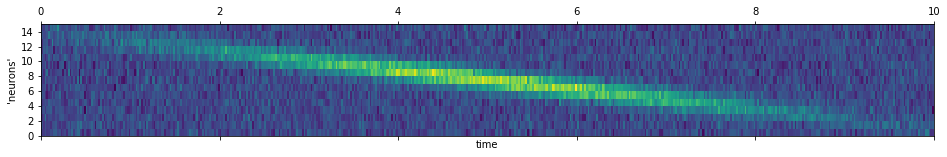

In [10]:
# let's create some "neural data" where each neuron responds after some delay
t = np.linspace(0, 10, 500) # time, 0-10 seconds
neural_delays = np.linspace(0, 10, 15) # delay for each neuron
neural_data = np.exp(-(t[:,None] - neural_delays[None])**2) # each "neuron" responds with some delay
neural_data *= np.exp(-0.1*(neural_delays-5)**2) # attenuate early and late responses
neural_data += np.random.randn(500,15)*0.1 # add some noise

plt.matshow(neural_data.T, extent=[0, t[-1], 0, len(neural_delays)], aspect='auto');
plt.xlabel("time"); plt.ylabel("'neurons'");

In [11]:
# .. apply PCA to the "neural data" ..
neural_loadings = PCA(n_components=2).fit(neural_data).transform(neural_data)

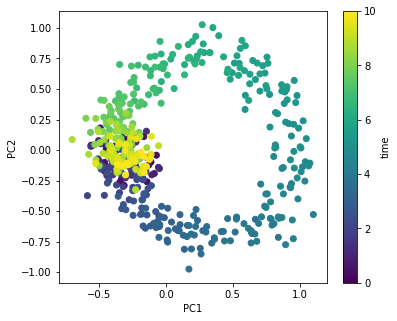

In [12]:
# et voila! ROTATIONAL DYNAMICS!
plt.figure(figsize=(6,5))
plt.scatter(neural_loadings[:,0], neural_loadings[:,1], c=t)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.colorbar(label="time");

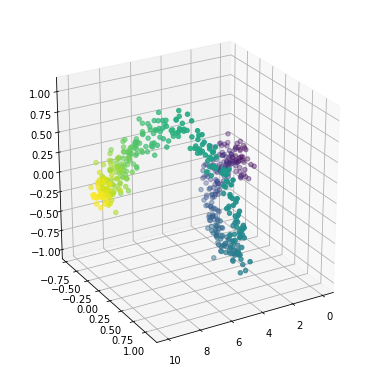

In [13]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(5,5)))
ax.scatter(t, neural_loadings[:,0], neural_loadings[:,1], c=t)
ax.view_init(25, 60)